<div style="border:solid green 2px; padding: 20px">
<b>Надежда, привет!</b>

Меня зовут Евгений Дащенко, и я буду проверять твой проект. Предлагаю общаться на «ты» 😊 Но если это не удобно - дай знать, и мы перейдем на "вы". 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных. Ты уже проделал большую работу над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Критическая ошибка: ❌</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Хорошо, но можно и лучше: ❗️</b> Так выделены небольшие замечания. Одна-два таких замечания в проекте допустимы, но если их будет больше - тебе будет необходимо внести исправления. Это как тестовое задание при приеме на работу: очень много мелких ошибок могут стать причиной отказа кандидату. 

</div>

<div class="alert alert-success">
<b>Все отлично: ✅</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента: ℹ️</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 

# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. наша задача — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу нам доступны два вида данных. Первые вписаны пользователем, например, к первому типу относятся площадь квартиры, её этаж и количество балконов. Вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.


<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Здорово, когда есть вступление в сам проект, каждый сможет быстрее разобраться в концепции / деталях работы. 

</div>

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv',sep = '\t')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


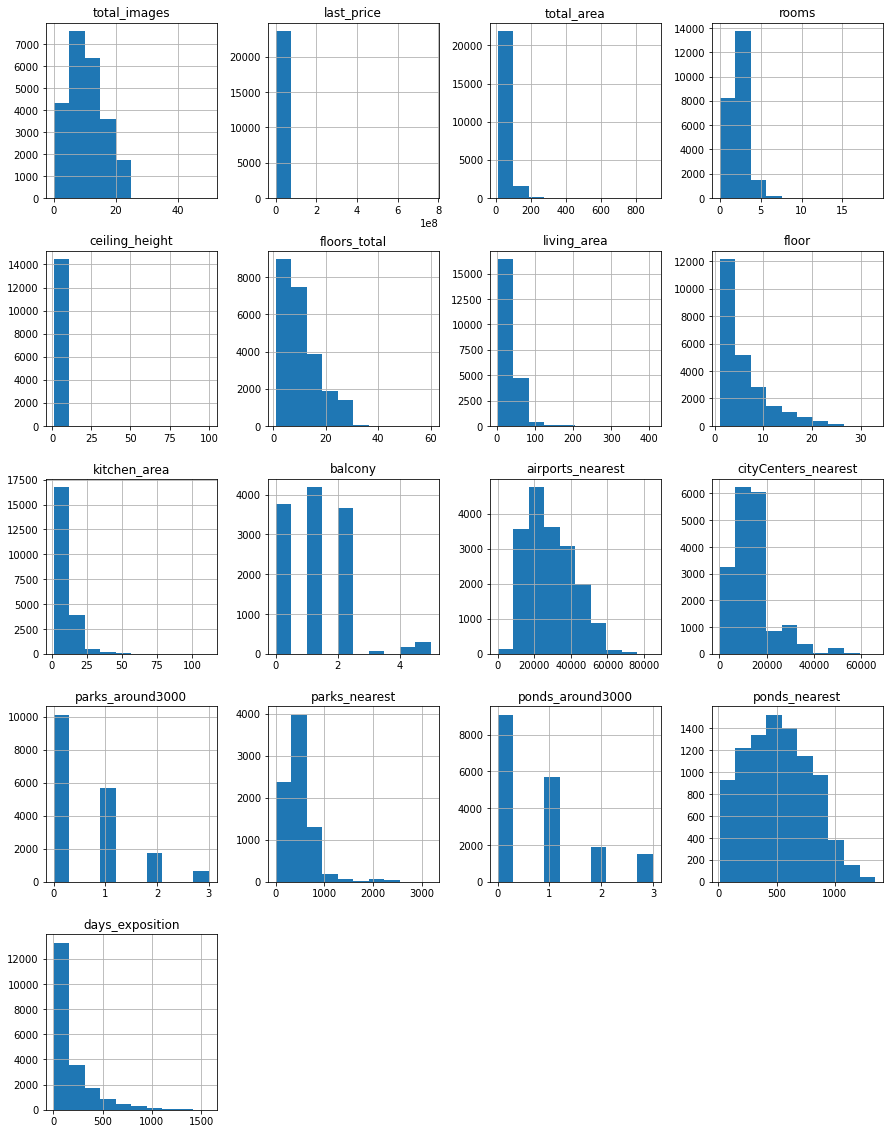

In [5]:
data.hist(figsize=(15,20))
plt.show()

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Классный способ визуализировать распределения сразу для всех столбцов 👍

</div>

### Предобработка данных

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

<div class="alert alert-info"> <b>Комментарий студента: </b> Оценила доли пропусков в столбцах, где есть незаполненные ячейки. Думаю есть более красивый вариант, чтобы вручную не выписывать название столбцов, но придумать как это должно быть не смогла. Также не пойму как на печать вывести название столбца сразу в print(). </div>

<div class="alert alert-success">
<b>Комментарий ревьюера (2): ✅</b>

Да, есть 😊    
    
    
`data.isna().mean()`
    
Оставил код ниже, как выводить данные в print.
    
    
</div>

In [7]:
data_columns = ['ceiling_height','floors_total','living_area','kitchen_area','locality_name','airports_nearest','cityCenters_nearest','days_exposition']

for col in data_columns:
    print('В столбце {} нулевых значений {:.1%}'. format(col, data[col].isna().value_counts()[1] / len(data)))

В столбце ceiling_height нулевых значений 38.8%
В столбце floors_total нулевых значений 0.4%
В столбце living_area нулевых значений 8.0%
В столбце kitchen_area нулевых значений 9.6%
В столбце locality_name нулевых значений 0.2%
В столбце airports_nearest нулевых значений 23.4%
В столбце cityCenters_nearest нулевых значений 23.3%
В столбце days_exposition нулевых значений 13.4%


In [8]:
# for col in data_columns:
#     print('В столбце {} нулевых значений {:.1%}'. format(col, data[col].isna().value_counts()[1] / len(data)))  

<div class="alert alert-success">
<b>Комментарий ревьюера: ❗️</b>

Рекомендую также оценивать доли пропусков по столбцам, таким образом мы сразу сможем понять где больше всего пропусков в нашем датафрейме.

</div>

Пропуски данных наблюдаются в 14 столбцах данных. 
Данные о высоте потолка, количество этажей в доме, площади квартиры, площади кухни, количества балконов являются пользовательскими. Их отсутствие в базе данных может свидетельствовать либо о невнимательном (недобросовестном) заполнении анкеты продавцом, либо об отсутствии информации у продавца (риэлтора).
Высоту потолка, Количество этажей, можно заменить соответствующими медианными значениями.
Отсутствие информации о балконах может свидетельствовать о их отсутствии, поэтому эти строки можно заполнить нулем.
Нет логичной замены для пустых значений столбцов "количество этажей в доме" (0,3 процента), "населенный пункт" (0.2 процента), поэтому записи с отсутствием указанных скорее всего надо исключить.
Отсутствие данных о принадлежности к аппартаментам может свидетельствовать о том, что недвижимость не относится к аппартаментам, поэтому возможно эти пропуски заменить нулями.
Расстояние от центра, до аэропорта, до парков и водоемов отсутствует скорее всего для отдаленных от Санкт-Петербурга населенных пунктов Ленинградской области по причине отсутствия данных в картографическом ресурсе по этому населенному пункту. Оставляем эти значения пустыми.

Также в датасете присутствует ряд данных, которые генерирует система: "сколько дней было опубликовано объявление", "дата публикации", "цена на момент снятия с публикации". Отсутствие данных в "сколько дней было опубликовано объявление" возможно возникло по причине того, что обьявление было размещено меньше суток и счетчик дней зафиксировал пустое значение, думаю возможно Nan приравнять к нулю.

In [9]:
#заменяем пропуски нулями в столбцах со счетными характеристиками
#data['balcony'] = data['balcony'].fillna(0)
#data['is_apartment'] = data['is_apartment'].fillna(0)
#data['days_exposition'] = data['days_exposition'].fillna(0)

<div class="alert alert-info"> <b>Комментарий студента: </b> Для заполнения незаполненных ячеек применила цикл for. </div>

In [10]:
columns = ['balcony', 'is_apartment', 'days_exposition']

for i in columns:
    data[i] = data[i].fillna(0)

In [11]:
#проверены результаты замены счетных харектерискик спустыми ячейками на "0"
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition             0
dtype: int64

Замену типа данных целесообразно делать в отношении счетных данных, таких как число балконов, количества дней размещения объявления, количества этажей в доме.Замена типа данных с вещественного на целочисленное необходима для исключения получения неожиданных результатов или ошибок.
Замена типа данных "first_day_exposition" с object на тип данных datetime64 позволит работать с данными значениями даты и времени.

In [12]:
#data['balcony'] = data['balcony'].astype(int)
#data['days_exposition'] = data['days_exposition'].astype(int)
#data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')
#data['last_price'] = data['last_price'].astype(int)

<div class="alert alert-info"> <b>Комментарий студента: </b> Выполнила рекомендации и применила метод astype() одновременно к нескольким столбцам. </div>

In [13]:
data = data.astype({"balcony": "int64", "days_exposition": "int64", "last_price": "int64"})
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

In [14]:
#проверила результат замены типов данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

В том числе метод `fillna` и `astype` можно применять к нескольким столбцам одновременно.
    
Если столбцов более 2–ух, то рекомендую применять цикл `for`.
    
Пример: 
    
`df.astype({ "col1": "float64", "col2": "int64"})`
    
</div>

```python

columns = [col1, col2, col3]

for i in columns:
    df[i] = df[i].fillna(0)

```

Работа по устранению не яваных дубликатов в столбце с названиями населенных пунктов проведена в отношении названий административно-территориальной единицы (АТЕ) (поселок, поселок городского типа, городской поселок). Считаю, что наличие разных вариантов наименования АТЕ связано с отсутствием справочника на ресурсе подачи обявлений о продаже недвижимости. Также проведена замена букв с "е" на "ё" в слове "поселка". Также в ходе анализа выявлено наличие ошибки в названии деревни "Курковицы" и "Куровицы". Замена не проведена. 

In [15]:
#устранены неяваные дубликаты в столбце с названиями населенных пунктов без создания нового столбца
#data['locality_name'] = data['locality_name'].str.replace('поселок','посёлок')
#data['locality_name'] = data['locality_name'].str.replace('городской посёлок','посёлок городского типа')
#data['locality_name'] = data['locality_name'].str.replace('посёлок городского типа','посёлок')
#data['locality_name'] = data['locality_name'].str.replace('посёлок Мурино','Мурино')
#data['locality_name'] = data['locality_name'].str.replace('Курковицы','Куровицы')

<div class="alert alert-info"> <b>Комментарий студента: </b> Выполнила рекомендации и применила цикл for для устранения неявных дубликатов. </div>

In [16]:
#Устраняем неяваные дубликаты в столбце с названиями населенных пунктов без создания нового столбца с использовнием цикла for

list_bad = ['поселок', 'городской посёлок', 'посёлок городского типа', 'посёлок Мурино', 'Курковицы']
list_good = ['посёлок', 'посёлок городского типа', 'посёлок', 'Мурино', 'Куровицы']

for j in range(len(list_bad)):
    data['locality_name'] = data['locality_name'].str.replace(list_bad[j],list_good[j])

<div class="alert alert-warning">
<b>Комментарий ревьюера: ❗️</b>


<s>Данные расчеты также можно выполнить с помощью цикла `for`.
    
</div>

In [17]:
#исследование высоты потолков в квартирах
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

В уникальных значениях "высота потолка" присутствуют аномальные и выбивающиеся значения. Однако, возможно предположить, что высота потолка  20., 22.6, 25., 32., 27., 24., 26., 27.5, 100. на самом деле соответствуют высоте потолка 2.5, 3.2, 2.7, 2.4, 2.6, 2.75, 10.0. Высота потолка доля 10 метров приемлема для пентхаусов. Ввиду того, что в датасете не представлена характеристика жилья по этому параметру (квартира, частный дом. пентхаус), то исключать записи с высотой потолка от 4 до 10 метров думаю будет не правильно. При этом высота потолка 14., 1., 1.2, 1.75 явно относятся к аномальным значениям, строки удаляем. Поэтому для высоты потолка определяем срез в интервале от 2.0 метров до 10.3 метров. Пустые ячейки заполним медианным значением высоты потолка.

In [18]:
# на каждом шаге цикла с помощью атрибута loc выбираем строки,
# в которых в ceiling_height высота потолка является аномальной for d in data['ceiling_height'].unique():
# и записываем в них значение высоты потолка уменьшенное в 10 раз  
for d in data['ceiling_height'].unique():
    if d >=20 and d <= 100:
        data.loc[(data['ceiling_height'] == d),'ceiling_height']*=0.1

In [19]:
# удаляем строки с аномальными значениями 
data = data[(data['ceiling_height'] != 1) & (data['ceiling_height'] != 1.2) & (data['ceiling_height'] != 14) &\
            (data['ceiling_height'] != 1.75)]

In [20]:
# заполняем пустые строки медианным значением
for t in data['ceiling_height'].unique():
    data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()

В 49 строках датафрейма отсутствуют наименования населенных пунктов. Учитывая, что логического обоснования заполнения категорированных данных нет, строки с пустыми значениями будут удалены.Также не позволят провести анализ данных строки с незаполненными данными об этажности дома.

In [21]:
data = data.dropna(subset=['floors_total','locality_name'])

<div class="alert alert-info"> <b>Комментарий студента: </b> Оформила все графики: присвоила название и подписала оси. </div>

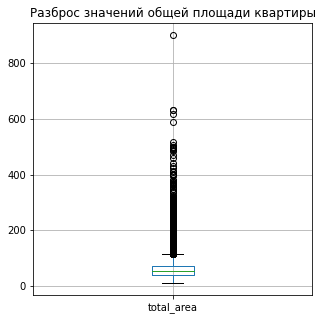

In [22]:
#строим диаграмму размаха значений общей площади квартиры
data.boxplot(column='total_area',figsize=(5,5))
plt.title('Разброс значений общей площади квартиры')
plt.show()

count    23561.000000
mean        60.324823
std         35.659632
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64


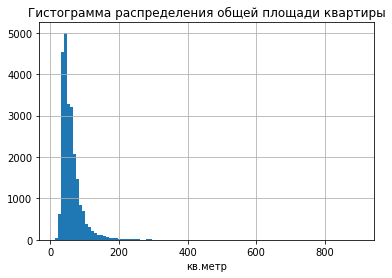

In [23]:
print(data['total_area'].describe())
data['total_area'].hist(bins=100, grid = True)
plt.xlabel('кв.метр', fontsize=10)
plt.title('Гистограмма распределения общей площади квартиры')
plt.show()

Аномальными значениями считаем общую площадь свыше 200 кв.метров. 

<div class="alert alert-warning">
<b>Комментарий ревьюера: ❗️</b>

<s>Не забывай пожалуйста подписывать каждый график. Это важный момент всего проекта, так мы быстрее сможем понять о чем идёт речь на самом графике.
</div>

In [24]:
data_anomal = len(data.loc[data['total_area'] > 300]) / len(data)
print('Аномальных {:.1%}'. format(data_anomal, 2) + ' значений')
data = data [data['total_area'] <= 300]

Аномальных 0.3% значений


In [25]:
print(data['total_area'].describe())

count    23500.000000
mean        59.421858
std         30.514123
min         12.000000
25%         40.000000
50%         52.000000
75%         69.300000
max        300.000000
Name: total_area, dtype: float64


In [26]:
# заполняем пустые ячейки с жилой площадью и площадью кухни медианным значением
for t in data['living_area'].unique():
    data.loc[data['living_area'].isna(), 'living_area'] = data['living_area'].median()
for t in data['kitchen_area'].unique():
    data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = data['kitchen_area'].median()    

In [27]:
data_anomal_2 = len(data.loc[data['living_area'] > 80]) / len(data)
print('Аномальных {:.1%}'. format(data_anomal_2, 2) + ' значений')

Аномальных 2.7% значений


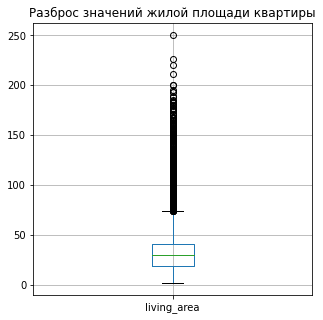

In [28]:
data.boxplot(column='living_area',figsize=(5,5))
plt.title('Разброс значений жилой площади квартиры')
plt.show()

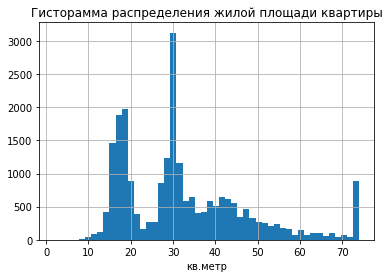

In [29]:
q1 = data['living_area'].quantile(0.25)
q3 = data['living_area'].quantile(0.75)
iqr = q3-q1
lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr
data['living_area'] = data['living_area'].clip(lower = lower,upper = upper)
data['living_area'].hist(bins=50, grid = True)
plt.title('Гисторамма распределения жилой площади квартиры')
plt.xlabel('кв.метр', fontsize=10)
plt.show()

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Кстати для того чтобы подписать график мы можем использовать метод `plt.title()` и в конце кода применить `plt.show()`
</div>

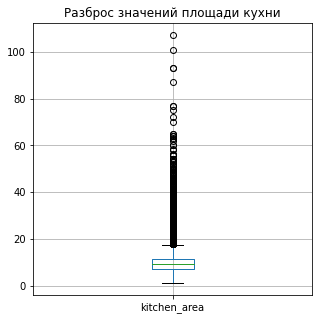

In [30]:
data.boxplot(column='kitchen_area',figsize=(5,5))
plt.title('Разброс значений площади кухни')
plt.show()

count    23500.000000
mean        10.366642
std          5.410184
min          1.300000
25%          7.300000
50%          9.100000
75%         11.400000
max        107.000000
Name: kitchen_area, dtype: float64
7.3 11.4 1.1499999999999995 17.55
count    23500.000000
mean         9.841625
std          3.346464
min          1.300000
25%          7.300000
50%          9.100000
75%         11.400000
max         17.550000
Name: kitchen_area, dtype: float64


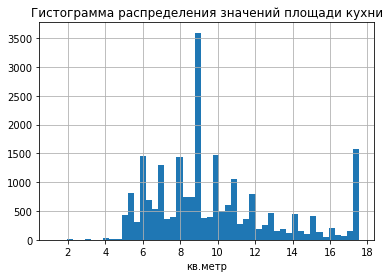

In [31]:
print(data['kitchen_area'].describe())
q1 = data['kitchen_area'].quantile(0.25)
q3 = data['kitchen_area'].quantile(0.75)
iqr = q3-q1
lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr
data['kitchen_area'] = data['kitchen_area'].clip(lower = lower,upper = upper)
print(q1,q3,lower,upper)
print(data['kitchen_area'].describe())
data['kitchen_area'].hist(bins=50, grid = True)
plt.title('Гистограмма распределения значений площади кухни')
plt.xlabel('кв.метр', fontsize=10)
plt.show()

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Классный способ для расчета интерквартильного размаха и определения таким образом диапазона нормального распределения 👍
</div>

### Посчитайте и добавьте в таблицу новые столбцы

In [32]:
#создаем новые столбца для анализа
#добавляем столбец с ценой одного кв.метра
data['price_square_meter'] = data['last_price']/data['total_area']
#добавляем день, месяц, год публикации объявления 
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year
#создаем категорированный столбец с типом этажа расположения квартиры  
data.loc[data['floor'] == 1,'type_floor'] = 'первый'
data.loc[data['floor'] == data['floors_total'],'type_floor'] = 'последний'
data.loc[(data['floor'] != 1) & (data['floor'] != data['floors_total']),'type_floor'] = 'другой'
#переводим расстояние от центра в километры
data['distance_center']=(data ['cityCenters_nearest']/1000).round()

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Мы достаточно детально обработали наши данные и добавили все необходимые значения в нашу выборку. Давай теперь проведём анализ.
    
</div>

### Проведите исследовательский анализ данных

In [33]:
pd.options.display.float_format ='{:,.3f}'.format
#data.describe()

Исследуем площадные характеристики квартир. Учитывая, что площадь квартир зависит от количества комнат, проанализируем квартиры на предмет площадных характеристик представленных на рынке недвиждимости.
В основном продают одно-, двух- и трехкомнатные квартиры, их самое большое количество на рынке. Средняя площадь таких квартир  не превышает 60 кв.метров. На рынке также представлены квартиры с минимальной общей площадью в 12 кв. метров и с максимальной в 900 кв. метров (1 квартира с 19 комнатами - наверно это замок). После обработки данных отбросили все квартиры с площадью более 200 кв. метров. С учетом распределения выборки можно отметить, что площадь квартир линейно зависит от количества до 7 комнат. Могу предположить, что в связи с тем, что квартиры свыше 7 комнат представлены на рынке фактически в единичном исполнении и площадные характеристики таких квартир не подчиняются линейной зависимости, исключение таких квартир из анализа не повлияло на его достоверность.   

In [34]:
#выводим площадные характеристики квартир
data_area = data.groupby('rooms')[['total_area','living_area','kitchen_area']].mean()
data_area.columns = ['средняя общая S','средняя жилая S ','средняя S кухни']
print (data_area)

       средняя общая S  средняя жилая S   средняя S кухни
rooms                                                    
0               27.551            19.442            9.100
1               37.579            18.875            9.411
2               55.823            31.586            9.488
3               77.657            45.658           10.284
4              106.235            59.017           11.428
5              150.453            67.477           13.655
6              185.827            71.575           14.958
7              197.007            71.567           15.219
8              215.863            74.000           12.575
9              256.775            63.000           12.688
10             259.567            74.000           17.550
11             188.900            74.000           12.600
14             245.400            74.000           17.550
16             270.000            74.000           13.000


Изучим цены на объекты недвижимости. На мой взгляд, что то с данными не так, почему то стоимость квартир сосредоточена около нуля. В описании данных отсутствует единица изменения (рубли, тыс рублей). На диаграмме размаха межквартильный размах ничтожный. Разбег цен увеличивается с увеличением комнат в квартире. Площадь растет линейно с увеличением комнат.

<div class="alert alert-info"> <b>Комментарий студента: </b> Согласно группировке данных (в предыдущем варианте анализа) у меня получилось, что самые дорогие квартиры не в Санкт-Петербурге, а в Зелегорорске, а это на мой взгляд сомнительно. Не могут квартиры под Санкт-Петербургом стоить дороже чем в северной столице. Получилось, что я вообще стоимость квартир никак не обрабатывала. Здесь провела обработку данных по столбцу 'last_price'.  </div>

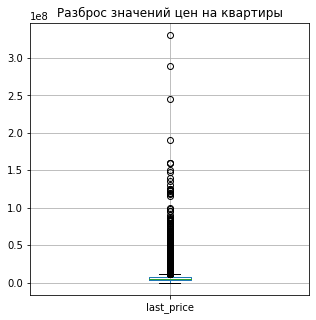

In [35]:
#диаграмма размаха цен
data.boxplot(column='last_price',figsize=(5,5))
plt.title('Разброс значений цен на квартиры')
plt.show()

count        23,500.000
mean      6,303,700.013
std       7,783,195.045
min          12,190.000
25%       3,400,000.000
50%       4,600,000.000
75%       6,750,000.000
max     330,000,000.000
Name: last_price, dtype: float64


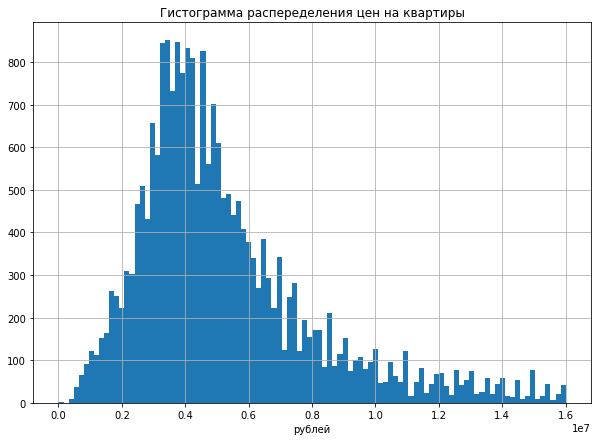

In [36]:
print(data['last_price'].describe())
data['last_price'].hist(bins=100, range=(0,16000000), grid = True, figsize=(10,7))
plt.title('Гистограмма распеределения цен на квартиры')
plt.xlabel('рублей', fontsize=10)
plt.show()

Разбег цен такой, что не помещается на графике. Слишком большие выбросы. Половина всех продаваемых квартир находится в интервале от 3,5 миллионов до 6,8 миллионов.

In [37]:
data_anomal_3 = len(data.loc[data['last_price'] > 16000000]) / len(data)
print('Аномальных {:.1%}'. format(data_anomal_3, 2) + ' значений')
data = data [data['last_price'] <= 16000000]

Аномальных 4.2% значений


<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Также мы можем увеличить сам график, чтобы его было удобнее изучать с помощью метода `plt.figure(figsize=(10,7))` или если используешь методы библиотеки `pandas`, в основном всегда есть атрибут `figsize=(10,7)`, который также поможет настроить ширину и высоту графика.
    
</div>

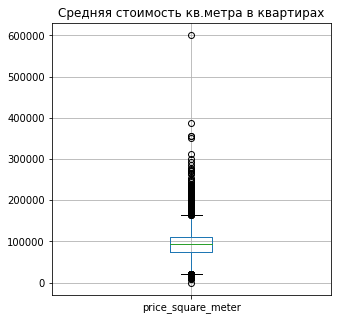

In [38]:
#рассмотрим среднюю стоимость квадратного метра
data.boxplot(column='price_square_meter',figsize=(5,5))
plt.title('Средняя стоимость кв.метра в квартирах')
plt.show()

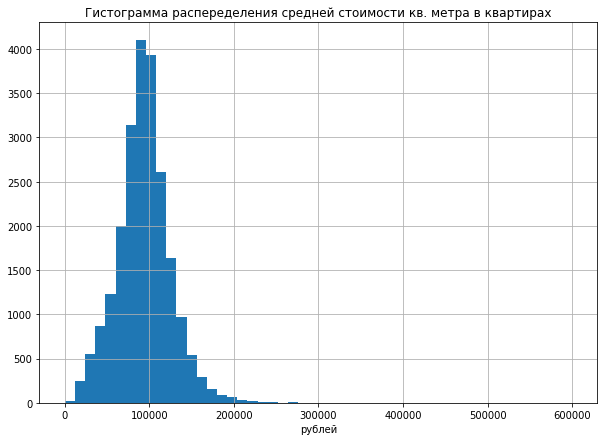

In [39]:
data['price_square_meter'] = data['last_price']/data['total_area']
data['price_square_meter'].hist(bins=50, grid = True, figsize=(10,7))
plt.xlim = ([0, 500000])
plt.title('Гистограмма распеределения средней стоимости кв. метра в квартирах')
plt.xlabel('рублей', fontsize=10)
plt.show()

Порядок средней стоимости квадратного метра варьируется в пределах 20-160 тыс. рублей за квадратный метр.

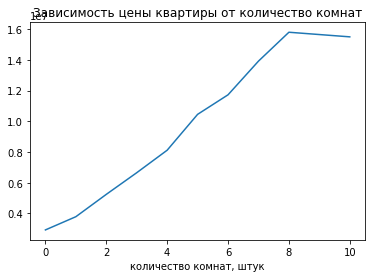

In [40]:
#проверим зависимость цены от количества комнат
data_rooms = data.groupby('rooms')['last_price'].mean()
data_rooms.plot(x='room',y='last_price')
plt.title('Зависимость цены квартиры от количество комнат')
plt.xlabel('количество комнат, штук', fontsize=10)
plt.show()

In [41]:
data.groupby('rooms')['last_price'].median()

rooms
0      2700000
1      3600000
2      4700000
3      5950000
4      7620000
5     10550000
6     12000000
7     14990000
8     15800000
10    15500000
Name: last_price, dtype: int64

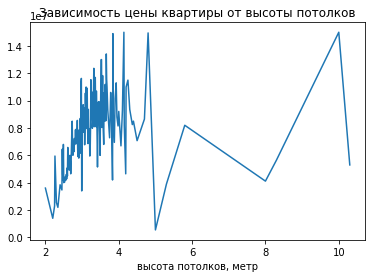

In [42]:
#исследуем зависимость цены от высоты потолков в квартирах
data_ceiling = data.groupby('ceiling_height')['last_price'].mean()
data_ceiling.plot(x='ceiling_height',y='last_price')
plt.title('Зависимость цены квартиры от высоты потолков')
plt.xlabel('высота потолков, метр', fontsize=10)
plt.show()

<div class="alert alert-warning">
<b>Комментарий ревьюера: ❗️</b>

А что мы хотели отобразить этим графиком ? 

</div>

<div class="alert alert-info"> <b>Комментарий студента: </b> Визуализация показала отсутствие зависимости цены квартиры от высоты потолка. </div>

<div class="alert alert-success">
<b>Комментарий ревьюера (2): ✅</b>

Тогда нам нужно использовать тип графика `kind='scatter'`, это будет нагляднее.
    

    
</div>

<div class="alert alert-danger">
<b>Комментарий ревьюера (2): ❌</b>

Однако есть момент. Нам не нужно делать группировку, чтобы посмотреть на линейное взаимоотношение между столбцами.
    
Оставил пример ниже, что имею в виду.
    
Будем иметь в виду на будущее эти моменты.
    
</div>

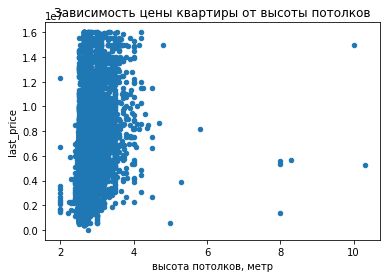

In [43]:
#исследуем зависимость цены от высоты потолков в квартирах

data.plot(x='ceiling_height',y='last_price', kind='scatter')
plt.title('Зависимость цены квартиры от высоты потолков')
plt.xlabel('высота потолков, метр', fontsize=10)
plt.show()

Высота потолков в основном находится в привычных размерах от 2,5 до 3,5. Среднее значение по категориям квартир мало различается.

In [44]:
#исследуем зависимость стоимости квадратного мерта от этажности
data.value_counts('type_floor')

type_floor
другой       16524
последний     3156
первый        2822
dtype: int64

In [45]:
addiction = data.groupby('type_floor')['last_price'].mean()/data.groupby('type_floor')['total_area'].mean()
add = addiction.sort_values()

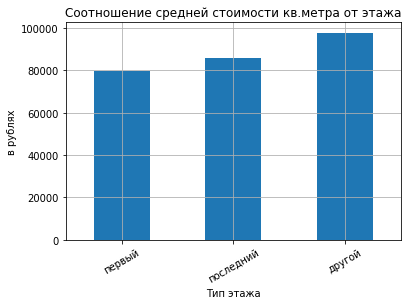

In [68]:
add.plot(kind='bar',
              ylabel = 'в рублях',
              grid=True,
              title = 'Соотношение средней стоимости кв.метра от этажа',
              xlabel = 'Тип этажа',
              rot=30)
plt.show()

<div class="alert alert-danger">
<b>Комментарий ревьюера: ❌</b>

<s>Давай все таки подпишем каждый график и тем самым сделаем наш проект еще презентабельнее.
    
</div>

Нет ничего удивительного, что стоимость квадратного метра на первых этажа ниже всего. Самые дорогие квартиры находтся на промежуточных этажах.

In [47]:
#рассчитываем границы транспортных колец  
q1 = data['distance_center'].quantile(0.25)
q3 = data['distance_center'].quantile(0.75)
iqr = q3-q1
lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr

Для анализа зависимости цены квадратного метра от удаления от центра разделили типы удаления на четыре транспортных кольца. Границы колец определили с помощью квартилей. Вывод: чем дальше от центра тем дешевле квадратный метр жилья.

In [48]:
#создаем категорированный столбец с типом этажа расположения квартиры  
data.loc[(data['distance_center'] >= data['distance_center'].quantile(0.25)) & \
         (data['distance_center'] <= data['distance_center'].quantile(0.75)),\
         'type_distance_center'] = 'Второе транспортное кольцо'
data.loc[(data['distance_center'] >= 16) & (data['distance_center'] <= upper),
         'type_distance_center'] = 'Третье транспортное кольцо'
data.loc[data['distance_center'] >= upper,'type_distance_center'] = 'Четвертое транспортное кольцо'
data.loc[data['distance_center'] <= 9,'type_distance_center'] = 'Первое транспортное кольцо'
addiction_distance = data.groupby('type_distance_center')['last_price'].mean()\
                     /data.groupby('type_distance_center')['total_area'].mean()
print(data.value_counts('type_distance_center'))
addiction_distance_sort = addiction_distance.sort_values() 

type_distance_center
Второе транспортное кольцо       7624
Третье транспортное кольцо       3883
Первое транспортное кольцо       3871
Четвертое транспортное кольцо    1642
dtype: int64


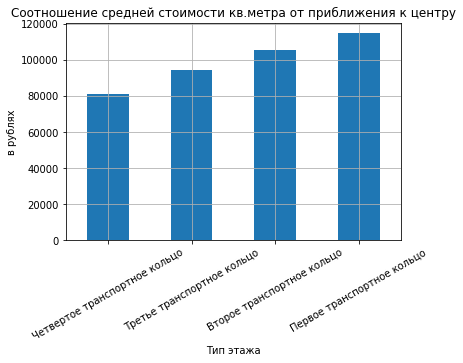

In [66]:
addiction_distance_sort.plot(kind='bar',
              ylabel = 'в рублях',
              grid=True,
              title = 'Соотношение средней стоимости кв.метра от приближения к центру',
              xlabel = 'Тип этажа',
              rot=30)
plt.show()

In [50]:
addiction_distance_total = data.groupby('type_distance_center')['last_price'].mean()
add_distance_total_sort = addiction_distance_total.sort_values() 

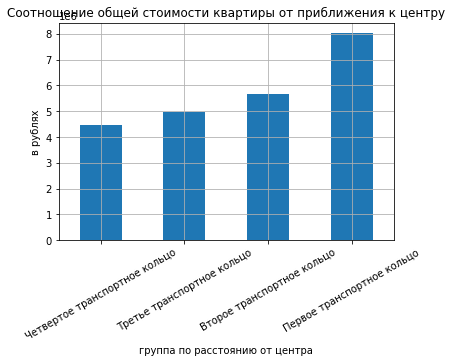

In [67]:
add_distance_total_sort.plot(kind='bar',
              ylabel = 'в рублях',
              grid=True,
              title = 'Соотношение общей стоимости квартиры от приближения к центру',
              xlabel = 'группа по расстоянию от центра',               
              rot=30)
plt.show()

Прямая зависимость наблюдается и в отношении общей стоимости квартир от удаления от центра Санкт-Петербурга. 

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Обрати внимание, что наши действия повторяются с точки зрения построения графиков.
    
Это говорит о том, что мы можем создать функцию, которая будет выполнять все действия за нас.
    
Тем самым мы сможем оптимизировать свой код и проект целиком.
    
</div>

Количество объялений зависит от дней недели. Основное количество объявлений публикуется в рабочие дни недели с пиком в середине.

count   22,502.000
mean       154.319
std        210.074
min          0.000
25%         23.000
50%         73.000
75%        195.000
max      1,580.000
Name: days_exposition, dtype: float64


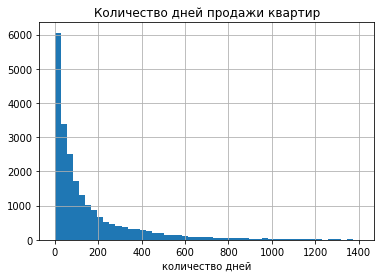

In [52]:
print(data['days_exposition'].describe())
data['days_exposition'].hist(range = (0, 1400), bins=50)
plt.title('Количество дней продажи квартир')
plt.xlabel('количество дней', fontsize=10)
plt.show()

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Мы также можем использовать цикл `for` для автоматизации построения графиков.
</div>

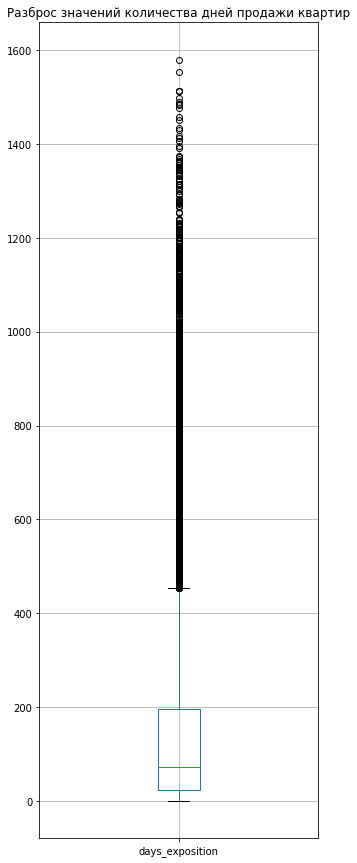

In [53]:
data.boxplot(column='days_exposition',figsize=(5,15))
plt.title('Разброс значений количества дней продажи квартир')
plt.show()

Из таблицы describe() видим основные характеристики датафрейма. Общее среднее значение времени продажи квартир - 157 дней. Медианное значение равно 74 дням. Превышение среднего значения над медианным свидетельствует о сильном влиянии выбросов. Удивительно, продавать квартиру больше 1580 дней - это  почти 4 года!!!! Наверно просто забыли удалить объявление. 0 день - тоже круто!! Скорее всего передумали продавать. Статистика показывает, что в соответствии с межквартильным размахом 50 % квартир обычно продаются от 22 до 199 дней. Определимся с параметрами быстрых и медленных продаж.
Будем считать быстрыми продажи укладывающиеся в интервал до 22 дней, а долгими свыше границы верхнего квартиля - 199 дней.

<div class="alert alert-warning">
<b>Комментарий ревьюера: ❗️</b>

<s>Если код не помещается в одну строку, рекомендую переносить его на следующую подстроку если мы внутри одного метода пишем код или с помощью обратного слеша, если применяем несколько методов. Так код читается быстрее и понятнее.
    
</div>

<div class="alert alert-info"> <b>Комментарий студента: </b> Услышала, исправила. </div>

In [54]:
#сравниваем по какой цене осуществлялись быстрые продажи
print(data.pivot_table(index = 'days_exposition', values = ['last_price','total_area','distance_center','rooms'],
                       aggfunc = 'median').head(22))
data.describe()

                 distance_center    last_price  rooms  total_area
days_exposition                                                  
0                         13.000 5,200,000.000  2.000      56.400
1                         14.000 4,000,000.000  2.000      49.900
2                         10.000 6,100,000.000  2.000      45.100
3                         13.000 4,150,000.000  2.000      45.115
4                         13.000 4,470,000.000  2.000      46.050
5                         13.000 4,150,000.000  2.000      46.050
6                         14.000 4,075,000.000  2.000      45.000
7                         14.000 4,480,000.000  2.000      45.000
8                         14.000 4,075,000.000  1.000      44.000
9                         13.000 4,250,000.000  2.000      45.200
10                        14.000 4,300,000.000  2.000      44.700
11                        14.000 4,630,200.000  2.000      48.100
12                        13.000 4,495,000.000  2.000      45.650
13        

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,weekday,month,year,distance_center
count,"22,502.000","22,502.000","22,502.000","22,502.000","22,502.000","22,502.000","22,502.000","22,502.000","22,502.000","22,502.000",...,"17,021.000","7,287.000","17,021.000","8,288.000","22,502.000","22,502.000","22,502.000","22,502.000","22,502.000","17,020.000"
mean,9.769,"5,221,655.006",55.550,1.986,2.684,10.757,31.471,5.881,9.605,0.596,...,0.576,492.603,0.732,528.023,154.319,"93,914.561",2.570,6.398,"2,017.382",14.620
std,5.595,"2,825,037.183",22.476,0.957,0.221,6.638,13.694,4.895,3.151,0.954,...,0.775,337.800,0.912,277.399,210.074,"31,661.408",1.791,3.488,1.026,8.577
min,0.000,"12,190.000",12.000,0.000,2.000,1.000,2.000,1.000,1.300,0.000,...,0.000,1.000,0.000,13.000,0.000,111.835,0.000,1.000,"2,014.000",0.000
25%,6.000,"3,385,000.000",39.550,1.000,2.600,5.000,19.000,2.000,7.100,0.000,...,0.000,291.000,0.000,309.000,23.000,"75,440.840",1.000,3.000,"2,017.000",10.000
50%,9.000,"4,500,000.000",50.405,2.000,2.650,9.000,30.000,4.000,9.100,0.000,...,0.000,456.000,0.000,516.000,73.000,"93,559.825",3.000,6.000,"2,017.000",13.000
75%,14.000,"6,350,000.000",66.000,3.000,2.700,16.000,39.650,8.000,11.000,1.000,...,1.000,614.000,1.000,738.000,195.000,"111,289.264",4.000,10.000,"2,018.000",17.000
max,50.000,"16,000,000.000",259.600,10.000,10.300,60.000,74.000,33.000,17.550,5.000,...,3.000,"3,190.000",3.000,"1,344.000","1,580.000","600,000.000",6.000,12.000,"2,019.000",66.000


In [55]:
#проверяем зависимость цены от общей площади, площади кухонь, жилой площади
data_analis=data[['last_price','total_area','living_area','kitchen_area']].copy()
data_analis.corr()   

,last_price,total_area,living_area,kitchen_area
last_price,1.000,0.752,0.611,0.544
total_area,0.752,1.000,0.866,0.486
living_area,0.611,0.866,1.000,0.245
kitchen_area,0.544,0.486,0.245,1.000


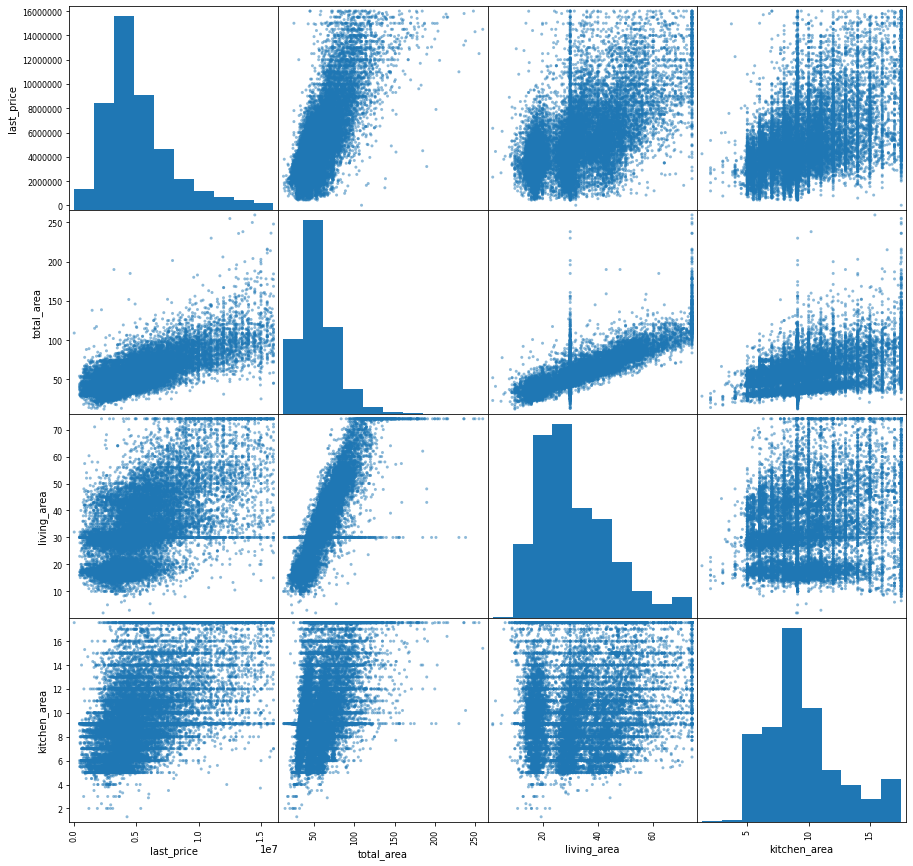

In [56]:
#Строим матрицу диаграмм рассеяния для визуализации корреляционной зависимости площадных характеристик недвижимости
pd.plotting.scatter_matrix(data_analis, figsize=(15, 15))
plt.show()

Очень хорошо визуализируется прямая зависимость от всех площадных характеристик недвижимости

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>
    
Очень важно строить график корреляции между переменными, ведь может произойти такая ситуация, что расчет у нас очень сильный а на графике абсолютно другая картина.
    
---

В том числе можно было построить матрицу корреляции между нужными нам переменными.
    
И визуализировать её с помощью метода `heatmap` из библиотеки `seaborn`.
    
</div>

<div class="alert alert-info"> <b>Комментарий студента: </b> Метод heatmap() строит тепловую карту. А у меня черный квардрат.... </div>

<AxesSubplot:>

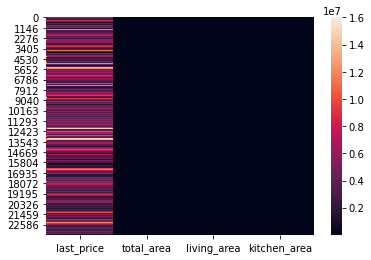

In [57]:
sns.heatmap(data_analis)

<div class="alert alert-success">
<b>Комментарий ревьюера (2): ✅</b>

Пример. 
    
</div>

<AxesSubplot:>

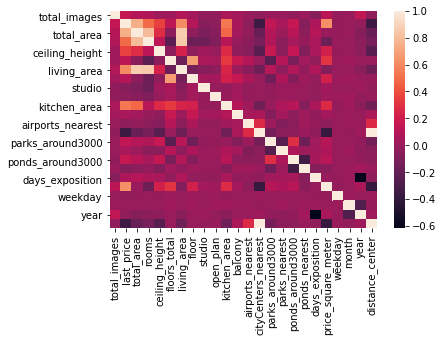

In [58]:
sns.heatmap(data.corr())

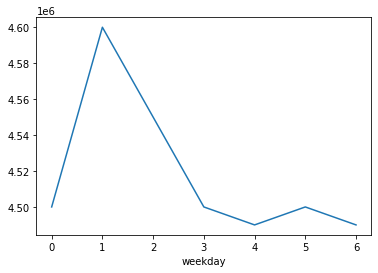

In [69]:
#оцениваем стоимость квартир от того в какой день недели разместили объявление о продаже
data_weekday = data.groupby('weekday')['last_price'].median()
data_weekday.plot(x='weekday',y='last_price')
plt.show()

Странно, но факт: самые дорогие недели размещают во вторник.

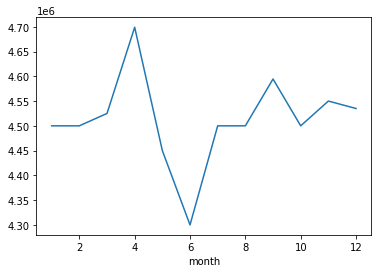

In [70]:
#оцениваем стоимость квартир от того в какой месяц разместили объявление о продаже
data_weekday = data.groupby('month')['last_price'].median()
data_weekday.plot(x='month',y='last_price')
plt.show()

Да! конечно летом, а именно в июне надо покупать жилье в Санкт-Петербурге

<AxesSubplot:xlabel='year'>

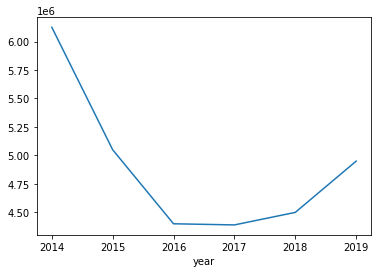

In [61]:
#оцениваем в каком году наблюдался спад продаж
data_weekday = data.groupby('year')['last_price'].median()
data_weekday.plot(x='year',y='last_price')
plt.show()

Что же там было такого в 2017 году?? Может быть изменились условия кредитования на рынке недвижимости. Или в питере был рекордный ввод нового жилья?

<div class="alert alert-info"> <b>Комментарий студента: </b> После обработки данных по столбцу с ценой квартир самыми дорогими стали квартиры в Санкт-Петербурге.  </div>

In [62]:
#Нашли 10 населенных пунктов где самые дорогие кв.метры и самые дешевые
data_name_max = data.groupby('locality_name')['price_square_meter'].mean().sort_values(ascending=False)
data_name_min = data.groupby('locality_name')['price_square_meter'].mean().sort_values(ascending=False)
print('ТОП дорогих квартир\n', data_name_max.head(10),'\n\n'
      'ТОП дешевых квартир\n', data_name_min.tail(10))

ТОП дорогих квартир
 locality_name
Санкт-Петербург     107,637.386
Пушкин              101,315.531
посёлок Лисий Нос   100,660.814
Зеленогорск         100,636.524
Сестрорецк          100,244.812
Кудрово             100,134.544
деревня Мистолово    98,549.977
посёлок Левашово     96,997.691
деревня Кудрово      92,473.548
посёлок Парголово    90,175.913
Name: price_square_meter, dtype: float64 

ТОП дешевых квартир
 locality_name
деревня Ям-Тесово         13,711.553
деревня Сижно             13,709.677
деревня Бор               13,157.895
посёлок Тёсово-4          12,931.034
деревня Малая Романовка   12,724.551
посёлок Совхозный         12,629.129
деревня Выскатка          12,335.481
деревня Вахнова Кара      11,688.312
посёлок станции Свирь     11,481.481
деревня Старополье        11,206.221
Name: price_square_meter, dtype: float64


   distance_center    last_price
0            0.000 9,590,000.000
1            1.000 9,000,000.000
2            2.000 9,000,000.000
3            3.000 8,000,000.000
4            4.000 8,325,000.000
5            5.000 8,150,000.000
6            6.000 7,500,000.000
7            7.000 6,599,500.000
8            8.000 6,675,000.000
9            9.000 5,200,000.000


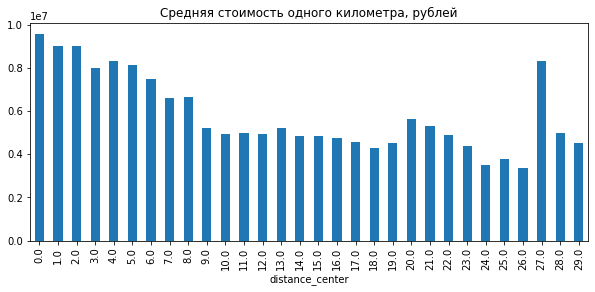

In [63]:
#Рассчитали среднюю стоимость 1 километра удаления от центра Санкт-Петербурга
good_data = data.query('locality_name == "Санкт-Петербург"')
good_data_filtered = good_data.groupby('distance_center').median()['last_price'].reset_index().sort_values\
                    (by='distance_center', ascending = True)
print(good_data_filtered.head(10)) 
good_data_filtered.plot(x = 'distance_center', y = 'last_price', kind = 'bar', title = 'Средняя стоимость одного километра, рублей',\
                        legend = None, xlim = 5, figsize=(10,4))
plt.show()

~~Стоимость километра уменьшается на 1,5 млн рублей на каждый километр удаления от центра Санкт - Петербурга~~

<div class="alert alert-info"> <b>Комментарий студента: </b> Согласно распределению явное падение стоимости происходит после 8 километра. Видимо это и есть центр Санкт-Петербурга. Выбросы на удалении 27 километров требуют дополнительной обработки данных. Таким образом наблюдается снижение стоимости жилой недвижимости при удалении от центра Санкт-Петербурга с 10,0 млн. рублей до 5 млн. рублей. </div>

<div class="alert alert-danger">
<b>Комментарий ревьюера: ❌</b>

<s>Нам также нужно визуализировать эту часть задания: 
    
> Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.
    
Важно обратить внимание, что вычислить нужно среднюю стоимость **каждого** километра.
    
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера (2): ✅</b>

Теперь все супер 👍
    
    
</div>

Общие выводы:
1. Изучение параметров: площади, цены, числа комнат, высоты потолков
Среднестатистический образ квартиры, выставленной на продажу с Ленинградской области: общая площадь квартиры 60 кв. метров, двухкомнатная, вчсота потолка в районе 2.ю7 метра, находится на 5 этаже 10 этажного дома, в удалении от цента Санкт-Петербурга около 15 километров.

2. Факторы, влияющие на стоимость квартиры
На стоимость квартиры влияет множество факторов. Ясная, хорошо прослеживаемыя зависимость выявлена от размера жилой площади, этажности размещения квартиры в доме. Дороже будет стоить квартира на промежуточных этажах. Не маловажную роль в определении цены имеет удаленность от центра города. Каждый километр удаления приносил удешевление в среднем на 1,5 млн. рублей. В отношении скорости продаж. Обычно квартира продается за 157 дней или 5 месяцев. Если время продажи квартиры меньше 22 дней - то это продавались не дорогие малометражные квартиры. Явной зависимости стоимости квартир от высоты потолка не увидела. Была найдена зависимость цены квартиры от дня размещения объявления. Так во вторник размещались квартиры которыет в последствии оказались дорогими, выставленные на продажу квартиры в выходные дни заметно были более дешевыми. Также были выявлены удачные с точки зрения минимальной цены периоды покупки квартир - это июнь. При анализе годовых продаж явный провал был выявлен в 2017 году. согласно открытим источикам именно в этот год на рынке недвижимости были изменены условия кредитования как для заемщиков так и инвесторов. Спад продаж также может свидетельствовать о низкой покупательской способности и большом количестве предложений. Самые дорогие квартиры почему то получились в Зеленогорске. Скорее всего неправильно обработаны выбросы, требуется доработка алгоритмов и спрособов анализа данных.


3. По вопросу организации сбора данных
По качеству данных можно посоветовать следующие улучшения: сделать привязку выбора адреса квартиры из адресного списка с целью исключения пустых ячеек по наименованию населнных пунктов. Кроме того, интересна была бы приязка к карте для оценивания ачественных характеристик местоположения квартиры. Также не помешало бы ввести автоматическую проверку ручного ввода аномальных численных значений, таких как высота потолка, площадь квартиры. Ввести обязательное заполнение полей, либо обеспечить сигнальное оповещение о незаполненых полях в объявлении.



<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Выводы понятны и логичны, а самое главное подкреплены выявленными фактами.
    
Достаточно детально проделанная работа и это не может не радовать 😊
    
Давай поправим мои комментарии и будем двигаться дальше.
    
Если у тебя вдруг есть какие–либо вопросы, то я с радостью отвечу на них 😊
       

</div>

<div class="alert alert-info"> <b>Комментарий студента: </b> Спасибо за рекомендации. Да я понимаю, что много итераций повторяются и по хорошему ты прав нужны функции. Но у меня сегодня не хватает компетенций их написать, мне требуется еще время на дополнительное изучение материалов по этому вопросу. Мне очень мало того, что дается в лекциях. И очень мало времени дается на осмысление всего. Поэтому все коды, что пишу, то пишу в большей части по аналогии, а не из понимания кода....Наверно требуется время. Но если у тебя есть возможность, буду благодарна если поможешь разобраться с функцией по построению графиков. Думаю, что и в преобработке данных тоже есть косяки. Вижу, что график зависимости от высоты потолков получился кривой из-за неправильеной предобработки данных. Я просто проставила в пустые ячейки медианные значения, а по хорошему нужно было сформировать категориальные переменные и разделить квартиры по группам в зависимости от удаленности от центра. И думаю тогда график бы показал однозначную зависимость. Потому что в историческом центре Санкт-Петербурга квартиры имеют однозначно другую высоту потолков нежели квартиры в новостройках. Потому что сегодня совсем другие стандарты, а мне доводилось снимать квартиру в старом доме на Невском. Я же могу после принятия с проектом еще поработать? Или мне нужно сейчас все эти нюансы устранить?  </div>

# <div class="alert alert-success">
<b>Комментарий ревьюера (2): ✅</b>

Да, ты можешь дальше с проектом поработать конечно. На крайний случай его можно скачать и работать локально.
    
---
   
По функциям оставил пример ниже. Ничего страшного, что сейчас не получается, со временем станет легче создавать свои функции.
    
---
       
В целом сам проект выполнен на хорошем уровне! На протяжении всей работы чувствуется глубина проработки задачи и это безусловный плюс для нас. Было использовано большое количество методов, которые будут помогать тебе в дальнейших проектах.
    
    
**[общий комментарий]** Ячейки **markdown** в том числе мы можем использовать как дополнительный способ стилизации нашего проекта. Оставил ниже ссылку, с примерами стилизации.

https://sqlbak.com/blog/jupyter-notebook-markdown-cheatsheet
    
</div>

In [64]:
def plot_hist(series, xlim, title, xlabel):
    series.hist(bins=50, grid = True, figsize=(10,7))
    plt.xlim = (xlim)
    plt.title(title)
    plt.xlabel(xlabel, fontsize=10)
    plt.show()

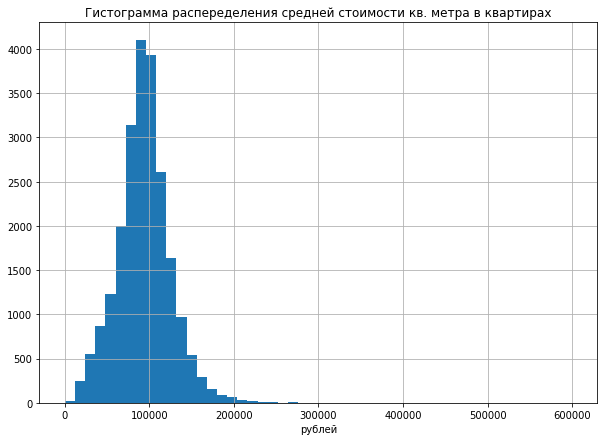

In [65]:
plot_hist(
    series=data['price_square_meter'],
    xlim=[0, 500000],
    title='Гистограмма распеределения средней стоимости кв. метра в квартирах',
    xlabel='рублей',
)

<div class="alert alert-success">
<b>Комментарий ревьюера (2): ✅</b>

Рад, что в целом все понятно и особенно здорово, что сразу стараешься применить новые знания на практике, ведь так они усвоятся гораздо быстрее. Тогда предлагаю двигаться дальше.
    
Поздравляю с успешным завершением проекта 😊👍
    
И желаю успехов в новых работах 😊
    
    
    
</div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [х]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [х]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [х]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [х ]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [х]  в каждом этапе есть промежуточные выводы
- [х ]  есть общий вывод